In [5]:
import pandas as pd
import numpy as np
from rdkit import Chem
from mordred import Calculator, descriptors
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# Feature engineering
### RDKit descriptors

In [8]:
df = pd.read_csv('vepreva_dataset.csv')
df.head(5)

,Unnamed: 0,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv
0,40078,gdb_40079,C1OC11CC2CCC2C1,3.15881,1.34203,1.27668,1.8779,80.36,-0.2559,0.0702,0.3261,1098.7650,0.184416,-387.075727,-387.067991,-387.067047,-387.108465,30.964
1,126141,gdb_126142,CCC(C)C1=CN=NO1,3.80259,0.93090,0.90204,4.1854,78.19,-0.2664,-0.0323,0.2341,1384.0255,0.158227,-419.200630,-419.191448,-419.190504,-419.235370,33.071
2,88802,gdb_88803,CC1OC1C1NCC1=O,3.18451,1.07494,0.88028,4.0216,73.80,-0.2490,-0.0290,0.2200,1328.7540,0.145950,-439.051930,-439.043003,-439.042059,-439.086645,32.210
3,54462,gdb_54463,NC(=O)C12CC1C1CN21,3.35309,1.45776,1.17216,3.1569,72.84,-0.2310,0.0177,0.2488,1048.4264,0.136513,-417.958239,-417.950439,-417.949495,-417.990439,30.708
4,20133,gdb_20134,C1C2CC(C12)N1CC1,5.52272,1.38172,1.23186,0.8051,76.21,-0.2299,0.0911,0.3210,1027.4810,0.166559,-327.859860,-327.852702,-327.851758,-327.891351,28.080


In [9]:
smiles = df['smiles'].to_list()

In [10]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df['smiles'])

In [11]:
df_with_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.437778,0.450231,5.437778,0.450231,0.446495,124.183,112.087,124.088815,50,0,...,0,0,0,0,0,0,0,0,0,0
1,4.825046,0.444444,4.825046,0.444444,0.603512,126.159,116.079,126.079313,50,0,...,0,0,0,0,0,0,0,0,0,0
2,10.715046,0.027778,10.715046,0.027778,0.474143,127.143,118.071,127.063329,50,0,...,0,0,0,0,0,0,0,0,0,0
3,10.762639,-0.106481,10.762639,0.096065,0.452231,124.143,116.079,124.063663,48,0,...,0,0,0,0,0,0,0,0,0,0
4,2.619213,1.069444,2.619213,1.069444,0.448068,109.172,98.084,109.089149,44,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10.533519,-0.596065,10.533519,0.275463,0.444178,128.091,124.059,128.033425,48,0,...,0,0,0,0,0,0,0,0,0,0
19996,10.402639,-0.467593,10.402639,0.101852,0.443924,126.111,120.063,126.031694,48,0,...,0,0,0,0,0,0,0,0,0,0
19997,10.043611,0.296481,10.043611,0.296481,0.518429,128.171,116.075,128.083730,52,0,...,0,0,0,0,0,0,0,0,0,0
19998,9.953985,0.226019,9.953985,0.226019,0.238884,128.131,120.067,128.058577,50,0,...,0,0,0,0,0,0,0,0,0,0


### Mordred descriptors

In [12]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [13]:
mordred_descriptors = All_Mordred_descriptors(df['smiles'])

100%|██████████| 20000/20000 [03:37<00:00, 92.04it/s] 


In [14]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,7.737734,7.114926,0,0,12.101350,2.579512,4.826492,12.101350,1.344594,3.321261,...,9.806591,61.378465,124.088815,5.908991,77,8,58.0,73.0,1.784722,1.777778
1,6.432911,6.705077,0,0,11.347542,2.230251,4.335428,11.347542,1.260838,3.093932,...,8.520986,50.281704,126.079313,6.635753,89,8,40.0,44.0,3.472222,2.194444
2,7.168527,7.450954,0,1,11.200768,2.481194,4.778203,11.200768,1.244530,3.252282,...,9.536834,59.383022,127.063329,7.059074,88,8,50.0,61.0,3.194444,1.916667
3,7.731245,8.614606,0,1,11.516350,2.837971,5.089399,11.516350,1.279594,3.402657,...,10.533775,66.240877,124.063663,7.297863,78,9,62.0,86.0,3.006944,1.763889
4,6.949747,6.738856,0,1,10.955632,2.605889,4.801940,10.955632,1.369454,3.281105,...,9.818529,61.892594,109.089149,5.741534,60,6,52.0,67.0,1.444444,1.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,3.099901,...,8.876126,37.975562,128.033425,9.848725,82,11,42.0,47.0,4.083333,2.055556
19996,7.614515,7.687794,0,0,12.019265,2.732977,5.279081,12.019265,1.335474,3.304583,...,10.464331,60.115085,126.031694,8.402113,74,7,60.0,81.0,2.395833,1.861111
19997,6.501860,6.631398,0,0,10.665324,2.364871,4.729742,10.665324,1.185036,3.120285,...,9.309190,39.095097,128.083730,6.099225,92,8,42.0,48.0,4.083333,2.138889
19998,6.323521,6.843639,0,0,11.385677,2.372130,4.254884,11.385677,1.265075,3.155831,...,8.773230,56.918277,128.058577,7.532857,105,7,40.0,45.0,3.472222,2.277778


### Final dataframe with descriptors

In [15]:
df3 = pd.concat([mordred_descriptors, df_with_descriptors], axis = 1)

In [16]:
df3

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.737734,7.114926,0,0,12.101350,2.579512,4.826492,12.101350,1.344594,3.321261,...,0,0,0,0,0,0,0,0,0,0
1,6.432911,6.705077,0,0,11.347542,2.230251,4.335428,11.347542,1.260838,3.093932,...,0,0,0,0,0,0,0,0,0,0
2,7.168527,7.450954,0,1,11.200768,2.481194,4.778203,11.200768,1.244530,3.252282,...,0,0,0,0,0,0,0,0,0,0
3,7.731245,8.614606,0,1,11.516350,2.837971,5.089399,11.516350,1.279594,3.402657,...,0,0,0,0,0,0,0,0,0,0
4,6.949747,6.738856,0,1,10.955632,2.605889,4.801940,10.955632,1.369454,3.281105,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,3.099901,...,0,0,0,0,0,0,0,0,0,0
19996,7.614515,7.687794,0,0,12.019265,2.732977,5.279081,12.019265,1.335474,3.304583,...,0,0,0,0,0,0,0,0,0,0
19997,6.501860,6.631398,0,0,10.665324,2.364871,4.729742,10.665324,1.185036,3.120285,...,0,0,0,0,0,0,0,0,0,0
19998,6.323521,6.843639,0,0,11.385677,2.372130,4.254884,11.385677,1.265075,3.155831,...,0,0,0,0,0,0,0,0,0,0


# Feature selection
## Unsupervised method 
### Drop features with high correlation


In [17]:
# Check descriptor data types
list(np.unique(df3.dtypes))

[dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')]

In [18]:
# Split numerical and boolean data types
df3_bool = df3.select_dtypes(np.bool8)
df3_num = df3.select_dtypes(exclude='bool')

In [171]:
df4 = df3_num.join(df['gap'])

In [172]:
df4

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,gap
0,7.737734,7.114926,0,0,12.101350,2.579512,4.826492,12.101350,1.344594,3.321261,...,0,0,0,0,0,0,0,0,0,0.3261
1,6.432911,6.705077,0,0,11.347542,2.230251,4.335428,11.347542,1.260838,3.093932,...,0,0,0,0,0,0,0,0,0,0.2341
2,7.168527,7.450954,0,1,11.200768,2.481194,4.778203,11.200768,1.244530,3.252282,...,0,0,0,0,0,0,0,0,0,0.2200
3,7.731245,8.614606,0,1,11.516350,2.837971,5.089399,11.516350,1.279594,3.402657,...,0,0,0,0,0,0,0,0,0,0.2488
4,6.949747,6.738856,0,1,10.955632,2.605889,4.801940,10.955632,1.369454,3.281105,...,0,0,0,0,0,0,0,0,0,0.3210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,3.099901,...,0,0,0,0,0,0,0,0,0,0.1459
19996,7.614515,7.687794,0,0,12.019265,2.732977,5.279081,12.019265,1.335474,3.304583,...,0,0,0,0,0,0,0,0,0,0.2022
19997,6.501860,6.631398,0,0,10.665324,2.364871,4.729742,10.665324,1.185036,3.120285,...,0,0,0,0,0,0,0,0,0,0.2208
19998,6.323521,6.843639,0,0,11.385677,2.372130,4.254884,11.385677,1.265075,3.155831,...,0,0,0,0,0,0,0,0,0,0.2481


In [65]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df4.iloc[0:20000, 0:2032])

c:\Users\Anastasia\miniconda3\envs\drops\lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Anastasia\miniconda3\envs\drops\lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Anastasia\miniconda3\envs\drops\lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [66]:
X_std.shape

(20000, 2032)

In [67]:
cov_mat =np.cov(X_std.T)

In [69]:
# Filter out highly correlated features

FILTER_THRESHOLD = 0.9

cols = df3_num.columns
cov_mat_df = pd.DataFrame(cov_mat, columns=cols)

upper_tri = cov_mat_df.where(
    np.triu(
        np.ones(cov_mat_df.shape), k=1).astype(np.bool)
        )

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > FILTER_THRESHOLD)]

df_after_FS = df3_num.drop(to_drop, axis=1)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_17012\2550253236.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones(cov_mat_df.shape), k=1).astype(np.bool)


In [72]:
df_final = pd.concat([df_after_FS, df4['gap']], axis=1)

Let's check the correlation of two boolean features

In [79]:
df3_bool_int = df3_bool * 1
df3_bool_int

,Lipinski,GhoseFilter
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
19995,1,0
19996,1,0
19997,1,0
19998,1,0


Let's try chi-squared test

In [84]:
contigency = pd.crosstab(df3_bool_int['Lipinski'], df3_bool_int['GhoseFilter'])

<Axes: xlabel='GhoseFilter', ylabel='Lipinski'>

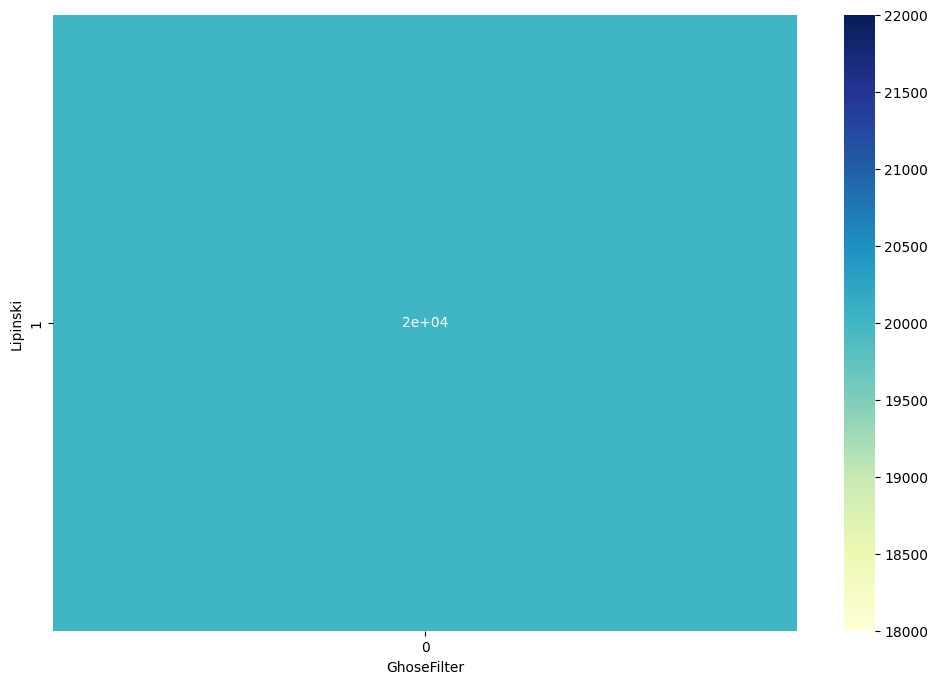

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [82]:
import scipy

chi_squared, p, _, _ = scipy.stats.chi2_contingency(contigency)

In [83]:
chi_squared
p

1.0

So, we can exclude these features from final dataset

In [74]:
df_final.to_csv('descriptors_cov_method.csv', index=False)

##  Supervised method
### Variance Treshold method

In [173]:
df4.isnull().values.any()

False

In [187]:
df4

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,gap
0,7.737734,7.114926,0,0,12.101350,2.579512,4.826492,12.101350,1.344594,3.321261,...,0,0,0,0,0,0,0,0,0,0.3261
1,6.432911,6.705077,0,0,11.347542,2.230251,4.335428,11.347542,1.260838,3.093932,...,0,0,0,0,0,0,0,0,0,0.2341
2,7.168527,7.450954,0,1,11.200768,2.481194,4.778203,11.200768,1.244530,3.252282,...,0,0,0,0,0,0,0,0,0,0.2200
3,7.731245,8.614606,0,1,11.516350,2.837971,5.089399,11.516350,1.279594,3.402657,...,0,0,0,0,0,0,0,0,0,0.2488
4,6.949747,6.738856,0,1,10.955632,2.605889,4.801940,10.955632,1.369454,3.281105,...,0,0,0,0,0,0,0,0,0,0.3210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6.611250,6.419894,0,0,10.891331,2.263821,4.527642,10.891331,1.210148,3.099901,...,0,0,0,0,0,0,0,0,0,0.1459
19996,7.614515,7.687794,0,0,12.019265,2.732977,5.279081,12.019265,1.335474,3.304583,...,0,0,0,0,0,0,0,0,0,0.2022
19997,6.501860,6.631398,0,0,10.665324,2.364871,4.729742,10.665324,1.185036,3.120285,...,0,0,0,0,0,0,0,0,0,0.2208
19998,6.323521,6.843639,0,0,11.385677,2.372130,4.254884,11.385677,1.265075,3.155831,...,0,0,0,0,0,0,0,0,0,0.2481


In [188]:
X = df4.iloc[0:20000, 0:2032]
y = df4['gap']

In [211]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.05)
X_reduced = selector.fit_transform(X)

c:\Users\Anastasia\miniconda3\envs\drops\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [212]:
X_reduced.shape

(20000, 1083)

In [214]:
#  generate the list of features that were kept
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()


In [215]:
reduced_df = pd.DataFrame(X_reduced, columns=selected_columns)

In [217]:
final_dataset2 = pd.concat([reduced_df, df4['gap']], axis=1)

In [219]:
final_dataset2.to_csv('descriptors_treshod_method.csv', index=False)